#### Gold Price Prediction

The objective of Gold Price Prediction project is to predict gold prices using the most comprehensive set of features and would apply random forest machine learning algorithms for forecasting and compare their results. 

##### Step1: Importing the Libraries

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
from forex_python.converter import CurrencyRates

##### Step2: Loading dataset

In [115]:
gold_data = pd.read_csv('D:\datasets\price-predict\gld_price_data.csv')

##### Step3: Investigating the datset

In [116]:
# print first 5 rows in the dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [117]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


This dataset contains 5 columns which are numerical in datatype and one column in Date format ranging from 2008 to 2018. Clearly the data shows value of the variables SPX,GLD,USO,SLV,EUR/USD against the dates in the date column.

In [118]:
# define a function to convert EUR/USD to INR
def convert_to_INR(value):
    return value * 74.14

# apply the function to the EUR/USD column and create a new column for INR
gold_data['INR'] = gold_data['EUR/USD'].apply(convert_to_INR)

# display the updated dataframe
print(gold_data.head())

       Date          SPX        GLD        USO     SLV   EUR/USD         INR
0  1/2/2008  1447.160034  84.860001  78.470001  15.180  1.471692  109.111245
1  1/3/2008  1447.160034  85.570000  78.370003  15.285  1.474491  109.318763
2  1/4/2008  1411.630005  85.129997  77.309998  15.167  1.475492  109.392977
3  1/7/2008  1416.180054  84.769997  75.500000  15.053  1.468299  108.859688
4  1/8/2008  1390.189941  86.779999  76.059998  15.590  1.557099  115.443320


In [119]:
# informations about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
 6   INR      2290 non-null   float64
dtypes: float64(6), object(1)
memory usage: 125.4+ KB


Data Cleaning

In [120]:
# checking the number of missing values
gold_data.isnull().sum()
check_nan = gold_data.isnull().values.any()
gold_data = gold_data.dropna()
#check_nan

In [121]:
#check for duplicates
duplicate = gold_data[gold_data.duplicated()]

duplicate


,Date,SPX,GLD,USO,SLV,EUR/USD,INR


##### Step 4: Exploratory Data Analysis

1)  Statistical measures of data 

In [122]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD,INR
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653,95.170037
std,519.111540,23.283346,19.523517,7.092566,0.131547,9.752911
min,676.530029,70.000000,7.960000,8.850000,1.039047,77.034945
25%,1239.874969,109.725000,14.380000,15.570000,1.171313,86.841146
50%,1551.434998,120.580002,33.869999,17.268500,1.303297,96.626403
75%,2073.010070,132.840004,37.827501,22.882500,1.369971,101.569631
max,2872.870117,184.589996,117.480003,47.259998,1.598798,118.534884


2. Correlation:

Positive Correlation
Negative Correlation

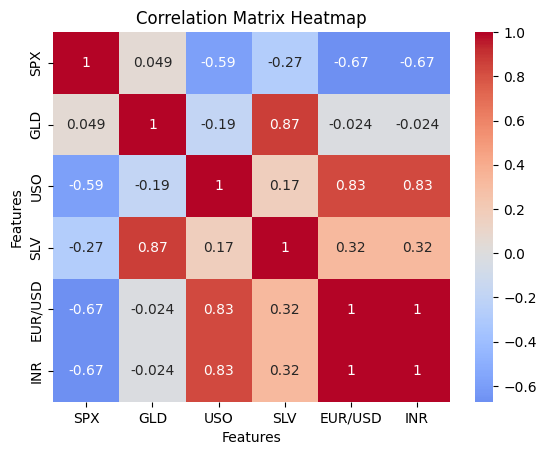

In [123]:
correlation = gold_data.corr()
sns.heatmap(correlation, cmap='coolwarm',
            center=0, annot=True)
  
# Set title and axis labels
plt.title('Correlation Matrix Heatmap')
plt.xlabel('Features')
plt.ylabel('Features')
  
# Show plot
plt.show()

Here the two columns SLV and GLD are strongly correlated with each other compared to others

3. Distribution of the GLD Price


<Axes: xlabel='GLD', ylabel='Density'>

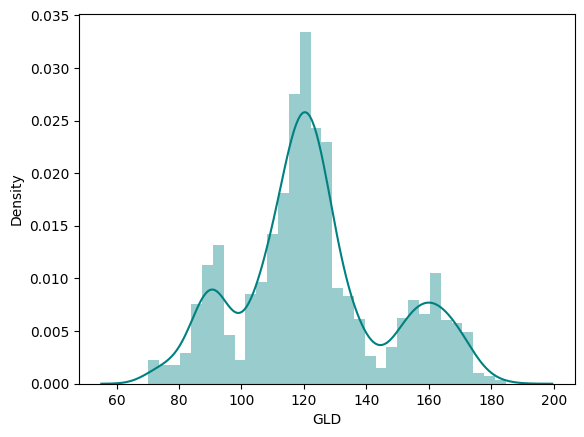

In [124]:
# checking the distribution of the GLD Price
sns.distplot(gold_data['GLD'],color='teal')

4. Price of gold for each increasing day

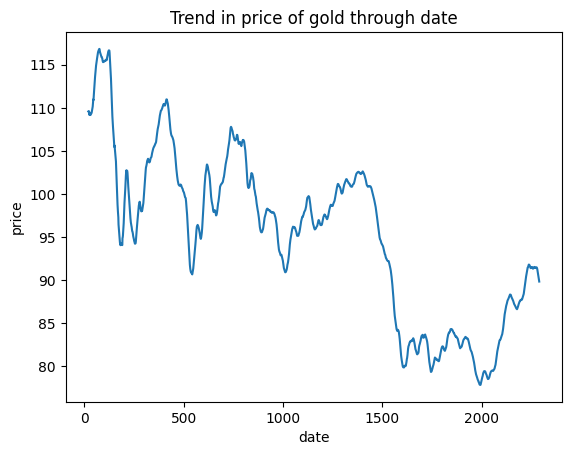

In [92]:
# apply rolling mean with window size of 3
gold_data["price_trend"] = gold_data["INR"].rolling(window=20).mean()

# reset the index to date column

# since we have used rolling method
# for 20 rows first 2 rows will be NAN
gold_data["price_trend"].loc[20:].plot()

# set title of the chart
plt.title("Trend in price of gold through date")

# set x_label of the plot
plt.xlabel("date")
plt.ylabel("price")
plt.show()



##### Step 5: Data Modeling and Prediction


Feature Selection

In [125]:
#Splitting the Features and Target
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

Splitting into Training data and Test Data

In [128]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

Showing Feature importance

In [131]:
#This class implements a meta estimator that fits a number of randomized decision trees (a.k.a. extra-trees) on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.
from sklearn.ensemble import ExtraTreesRegressor
ex=ExtraTreesRegressor()
ex.fit(X_train,Y_train)

ExtraTreesRegressor()

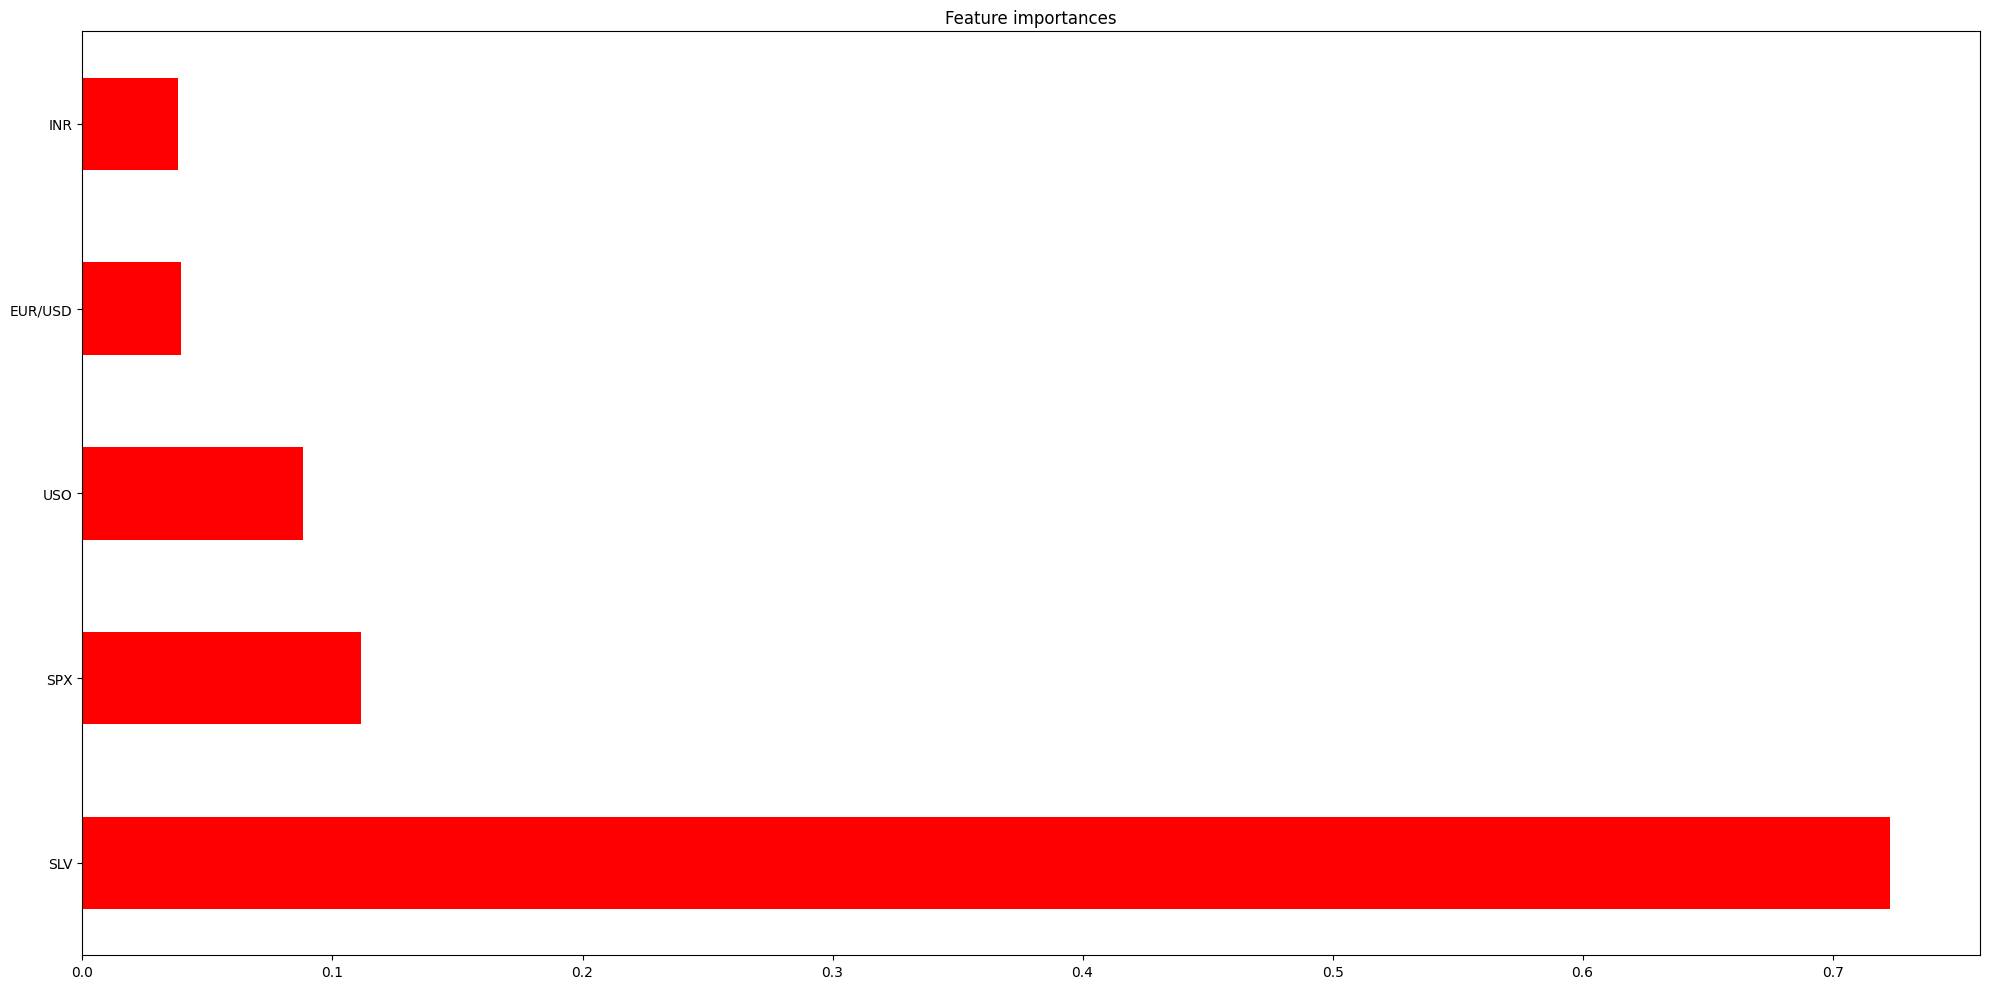

In [137]:
plt.figure(figsize=(20,10))
plt.title('Feature importances')
feat=pd.Series(ex.feature_importances_,index=X_train.columns)
feat.nlargest(21).plot(kind='barh', color="r", align="center")
plt.tight_layout()
plt.grid(False)
plt.show()

Model Training: Random Forest Regressor

In [138]:
regressor = RandomForestRegressor(n_estimators=100)

In [139]:
# training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

Model Evaluation for Logistic Regression

In [151]:

print('Accuracy score on training data:', regressor.score(X_train,Y_train))
print('Accuracy score on testing data:', regressor.score(X_test,Y_test))

Accuracy score on training data: 0.9984824564531326
Accuracy score on testing data: 0.9896658752622725


Compare the Actual Values and Predicted Values in a Plot

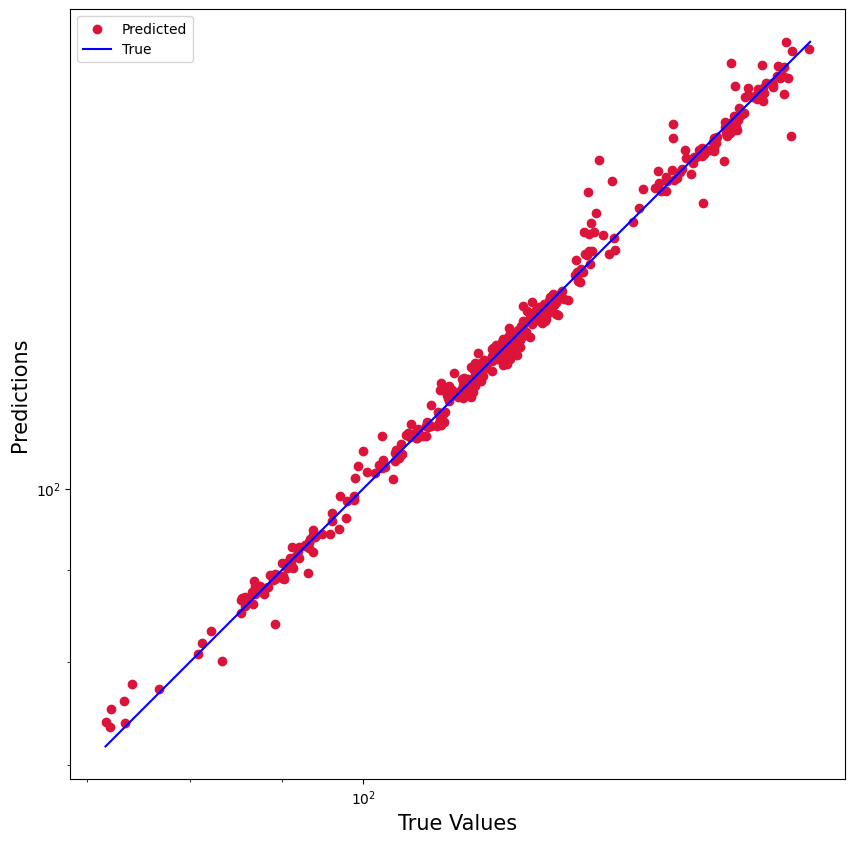

In [147]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)
Y_test = list(Y_test)
plt.figure(figsize=(10,10))
plt.scatter(Y_test, test_data_prediction, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(test_data_prediction), max(Y_test))
p2 = min(min(test_data_prediction), min(Y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.legend(["Predicted", "True"], loc ="upper left")

plt.axis('equal')
plt.show()

The model gives 99.84 % accuracy on training dataset. The model gives 98.96 % accuracy when testing dataset' is present.